In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
excercise = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Calories_Burnt_Prediction\Dataset\exercise.csv')
calories = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Calories_Burnt_Prediction\Dataset\calories.csv')

In [84]:
print(excercise.shape, calories.shape)

(15000, 8) (15000, 2)


In [85]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [86]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [87]:
excercise = excercise.merge(calories, on='User_ID')

In [88]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [89]:
excercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [90]:
excercise.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [91]:
encoder = LabelEncoder()
excercise['Gender'] = encoder.fit_transform(excercise["Gender"])

In [92]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


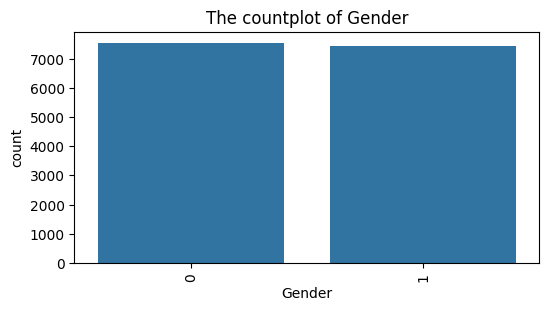

In [93]:
plt.figure(figsize=(6, 3))
    
# Create a count plot for the current feature
sns.countplot(x='Gender', data=excercise)

# Set the title of the plot
plt.title(f'The countplot of Gender')
    
# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
    
# Display the plot
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_8196\1927375371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(excercise[column])  # Create density plot


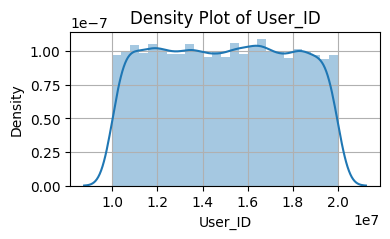

C:\Users\Hp\AppData\Local\Temp\ipykernel_8196\1927375371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(excercise[column])  # Create density plot


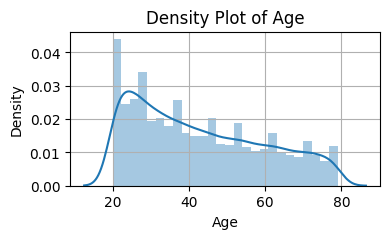

C:\Users\Hp\AppData\Local\Temp\ipykernel_8196\1927375371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(excercise[column])  # Create density plot


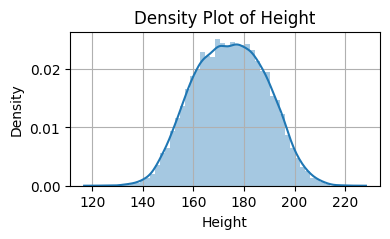

C:\Users\Hp\AppData\Local\Temp\ipykernel_8196\1927375371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(excercise[column])  # Create density plot


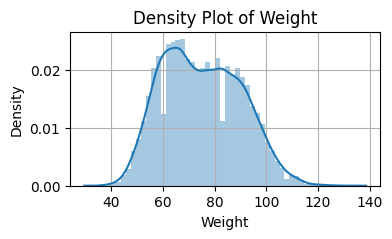

C:\Users\Hp\AppData\Local\Temp\ipykernel_8196\1927375371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(excercise[column])  # Create density plot


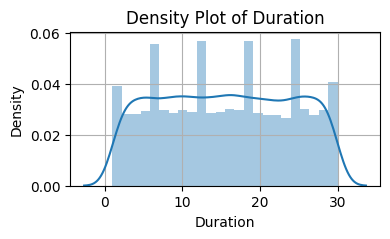

C:\Users\Hp\AppData\Local\Temp\ipykernel_8196\1927375371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(excercise[column])  # Create density plot


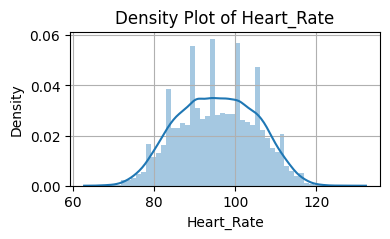

C:\Users\Hp\AppData\Local\Temp\ipykernel_8196\1927375371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(excercise[column])  # Create density plot


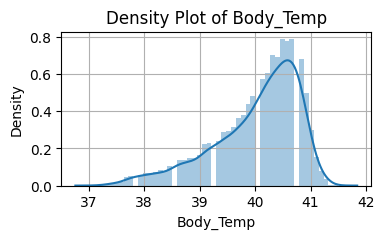

C:\Users\Hp\AppData\Local\Temp\ipykernel_8196\1927375371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(excercise[column])  # Create density plot


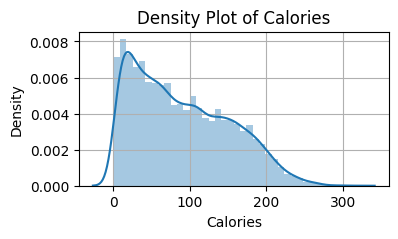

In [94]:
numeric_columns = excercise.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column and create density plots
for column in numeric_columns:
    plt.figure(figsize=(4, 2))  # Set the figure size
    sns.distplot(excercise[column])  # Create density plot
    plt.title(f'Density Plot of {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Density')  # Set the y-axis label
    plt.grid(True)  # Show grid
    plt.show()  # Display the density plot

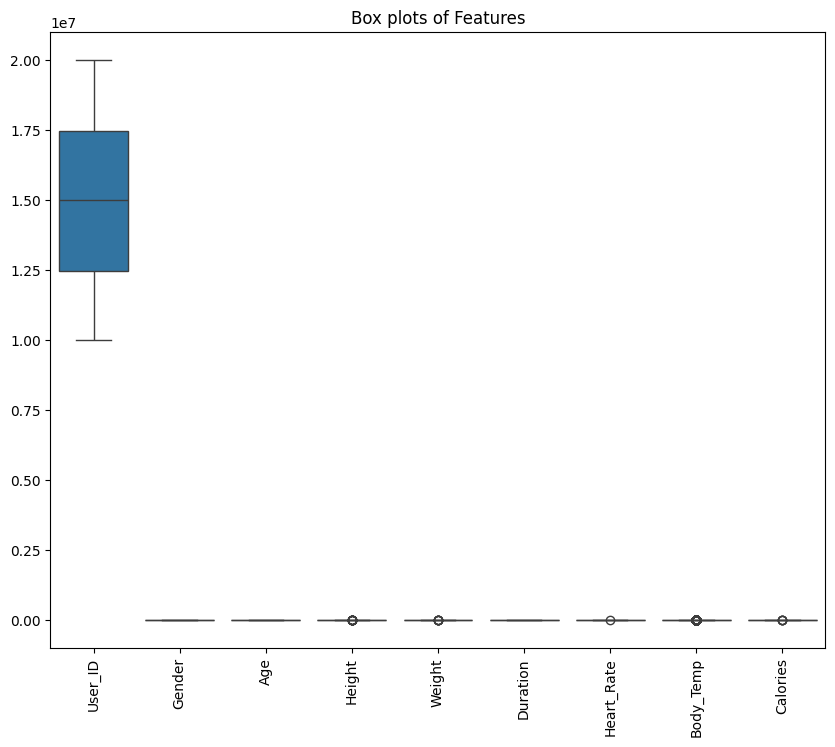

In [95]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=excercise)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

In [96]:
from scipy.stats.mstats import winsorize
excercise['Height_winsorized'] = winsorize(excercise['Height'], limits=[0.05, 0.05])
excercise['weight_winsorized'] = winsorize(excercise['Weight'], limits=[0.05, 0.05])
excercise['body_temp_winsorized'] = winsorize(excercise['Body_Temp'], limits=[0.05, 0.05])
excercise['Heart_Rate_winsorized'] = winsorize(excercise['Heart_Rate'], limits=[0.05, 0.05])
excercise.drop(['Height','Weight','Heart_Rate','Body_Temp'], axis=1, inplace=True)

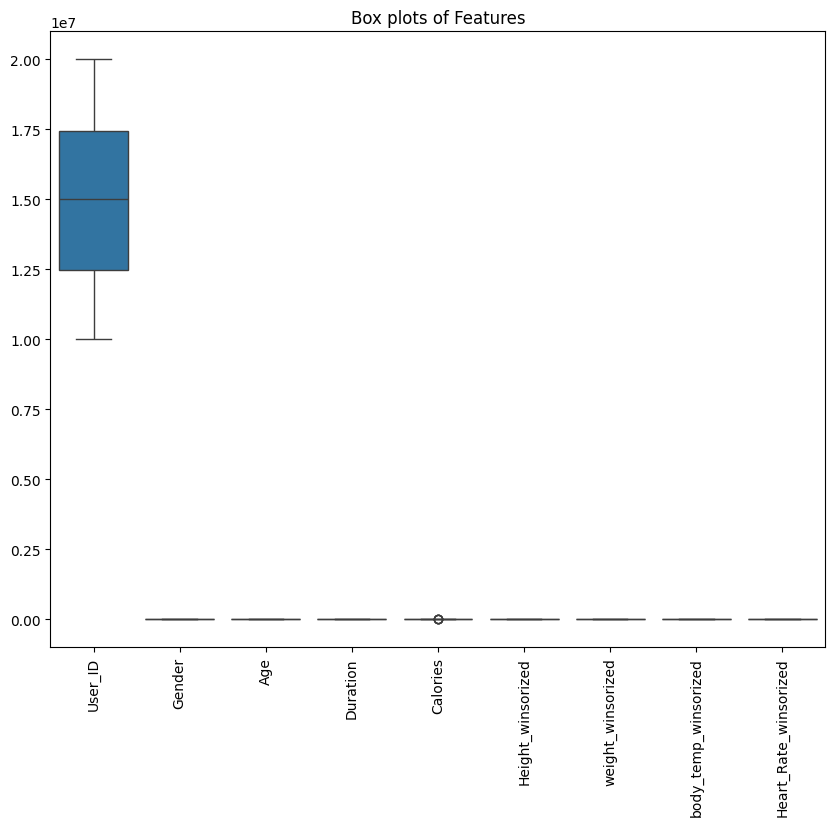

In [97]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=excercise)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

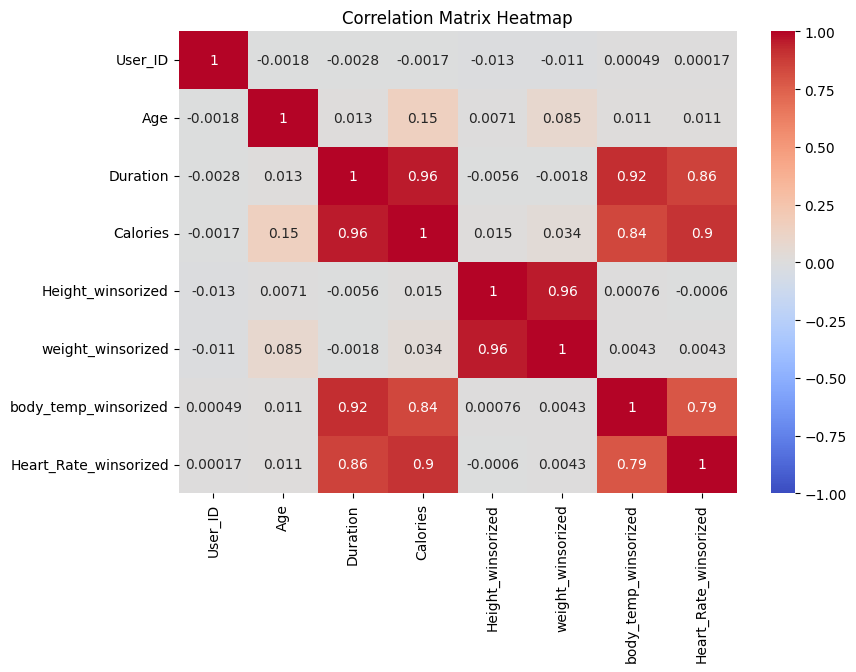

In [98]:
# Select numerical columns
numerical_columns = excercise.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [99]:
correlation_matrix['Calories']

User_ID                 -0.001661
Age                      0.154395
Duration                 0.955421
Calories                 1.000000
Height_winsorized        0.015404
weight_winsorized        0.033894
body_temp_winsorized     0.842300
Heart_Rate_winsorized    0.900817
Name: Calories, dtype: float64

In [112]:
excercise['Duration_body_temp'] = excercise['Duration'] * excercise['body_temp_winsorized']
excercise['body_temp_heart_rate'] = excercise['Heart_Rate_winsorized'] * excercise['body_temp_winsorized']
excercise['Duration_heart_rate'] = excercise['Duration'] * excercise['Heart_Rate_winsorized']
excercise['duration_heart_body'] = excercise['Duration'] * excercise['Heart_Rate_winsorized']* excercise['body_temp_winsorized']

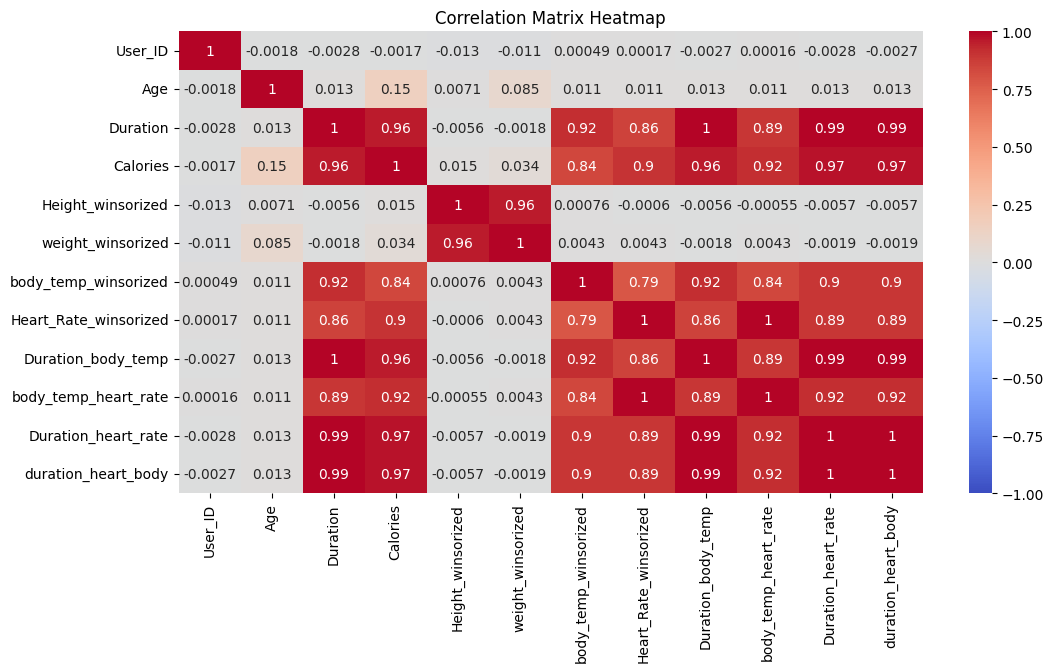

In [113]:
# Select numerical columns
numerical_columns = excercise.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [114]:
X = excercise.drop(['User_ID', 'Calories'], axis=1)
y=excercise['Calories']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 Gender                   0.007835
Age                      0.025614
Duration                 0.000062
Height_winsorized        0.001053
weight_winsorized        0.002352
body_temp_winsorized     0.000230
Heart_Rate_winsorized    0.001752
Duration_body_temp       0.000349
body_temp_heart_rate     0.006484
Duration_heart_rate      0.805713
duration_heart_body      0.148556
dtype: float64


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(12000, 11) (3000, 11) (12000,) (3000,)


In [117]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
from sklearn.svm import SVR
# Initialize and fit the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 0.8575791129781472
Mean Squared Error (MSE): 6.936610455216243
Root Mean Squared Error (RMSE): 2.633744569090982
R^2 Score: 0.998281226744698
